In [1]:
# Loading in modules:
import os
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
import warnings
warnings.filterwarnings('ignore')

In [2]:
print("Current directory is:", os.getcwd())

Current directory is: C:\Users\cderf\OneDrive\Desktop\New folder


In [3]:
data = pd.read_csv('asteroiddata.csv')

## Checking to see what types my data contains and then breaking it apart to deal with null or missing values

In [4]:
print(data.dtypes)

id                 object
spkid               int64
full_name          object
pdes               object
name               object
prefix             object
neo                object
pha                object
H                 float64
diameter          float64
albedo            float64
diameter_sigma    float64
orbit_id           object
epoch             float64
epoch_mjd           int64
epoch_cal         float64
equinox            object
e                 float64
a                 float64
q                 float64
i                 float64
om                float64
w                 float64
ma                float64
ad                float64
n                 float64
tp                float64
tp_cal            float64
per               float64
per_y             float64
moid              float64
moid_ld           float64
sigma_e           float64
sigma_a           float64
sigma_q           float64
sigma_i           float64
sigma_om          float64
sigma_w           float64
sigma_ma    

In [5]:
print(data.isna().sum())
print(data.shape)

id                     0
spkid                  0
full_name              0
pdes                   0
name              936460
prefix            958506
neo                    4
pha                19921
H                   6263
diameter          822315
albedo            823421
diameter_sigma    822443
orbit_id               0
epoch                  0
epoch_mjd              0
epoch_cal              0
equinox                0
e                      0
a                      0
q                      0
i                      0
om                     0
w                      0
ma                     1
ad                     4
n                      0
tp                     0
tp_cal                 0
per                    4
per_y                  1
moid               19921
moid_ld              127
sigma_e            19922
sigma_a            19922
sigma_q            19922
sigma_i            19922
sigma_om           19922
sigma_w            19922
sigma_ma           19922
sigma_ad           19926


In [6]:
X_num = data.drop(['id', 'full_name', 'pdes', 'name', 'prefix', 'neo', 'pha',
                  'orbit_id', 'equinox','class'], axis=1)
print(X_num.dtypes)
print(X_num.isna().sum())
print(X_num.shape)

spkid               int64
H                 float64
diameter          float64
albedo            float64
diameter_sigma    float64
epoch             float64
epoch_mjd           int64
epoch_cal         float64
e                 float64
a                 float64
q                 float64
i                 float64
om                float64
w                 float64
ma                float64
ad                float64
n                 float64
tp                float64
tp_cal            float64
per               float64
per_y             float64
moid              float64
moid_ld           float64
sigma_e           float64
sigma_a           float64
sigma_q           float64
sigma_i           float64
sigma_om          float64
sigma_w           float64
sigma_ma          float64
sigma_ad          float64
sigma_n           float64
sigma_tp          float64
sigma_per         float64
rms               float64
dtype: object
spkid                  0
H                   6263
diameter          822315
a

## Filling missing/null values with their corresponding median. This was chosen over their average since the median handles outliers better

In [7]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy="median")
imputer.fit(X_num)
X = imputer.transform(X_num)
X_clean = pd.DataFrame(X, columns=X_num.columns)

In [8]:
print(X_clean.isna().sum())
print(X_clean.shape)

spkid             0
H                 0
diameter          0
albedo            0
diameter_sigma    0
epoch             0
epoch_mjd         0
epoch_cal         0
e                 0
a                 0
q                 0
i                 0
om                0
w                 0
ma                0
ad                0
n                 0
tp                0
tp_cal            0
per               0
per_y             0
moid              0
moid_ld           0
sigma_e           0
sigma_a           0
sigma_q           0
sigma_i           0
sigma_om          0
sigma_w           0
sigma_ma          0
sigma_ad          0
sigma_n           0
sigma_tp          0
sigma_per         0
rms               0
dtype: int64
(958524, 35)


## Dealing with missing categorical values and prepping data to implement dummy variables. Missing rows will be dropped completely.

In [9]:
X_cat = data[['neo', 'pha', 'orbit_id', 'class']]
print(X_cat.head)
print(type(X_cat))
print(X_cat.shape)

<bound method NDFrame.head of        neo pha orbit_id class
0        N   N   JPL 47   MBA
1        N   N   JPL 37   MBA
2        N   N  JPL 112   MBA
3        N   N   JPL 35   MBA
4        N   N  JPL 114   MBA
...     ..  ..      ...   ...
958519   N   N    JPL 5   MBA
958520   N   N        8   MBA
958521   Y   Y       17   APO
958522   N   N    JPL 3   MBA
958523   N   N    JPL 3   MBA

[958524 rows x 4 columns]>
<class 'pandas.core.frame.DataFrame'>
(958524, 4)


In [10]:
print(X_cat.isna().sum())
print(X_cat.shape)

neo             4
pha         19921
orbit_id        0
class           0
dtype: int64
(958524, 4)


In [11]:
X_cat2 = X_cat.copy()
print(X_cat2.head())
print(X_cat2.shape)
print(X_cat2.isna().sum())

  neo pha orbit_id class
0   N   N   JPL 47   MBA
1   N   N   JPL 37   MBA
2   N   N  JPL 112   MBA
3   N   N   JPL 35   MBA
4   N   N  JPL 114   MBA
(958524, 4)
neo             4
pha         19921
orbit_id        0
class           0
dtype: int64


In [12]:
X_cat2 = X_cat2.dropna(inplace=False)

In [13]:
print(X_cat2.isna().sum())
print(X_cat2.shape)
print(X_cat2.head)
print(type(X_cat2)) #should no longer have missing values 

neo         0
pha         0
orbit_id    0
class       0
dtype: int64
(938599, 4)
<bound method NDFrame.head of        neo pha orbit_id class
0        N   N   JPL 47   MBA
1        N   N   JPL 37   MBA
2        N   N  JPL 112   MBA
3        N   N   JPL 35   MBA
4        N   N  JPL 114   MBA
...     ..  ..      ...   ...
958519   N   N    JPL 5   MBA
958520   N   N        8   MBA
958521   Y   Y       17   APO
958522   N   N    JPL 3   MBA
958523   N   N    JPL 3   MBA

[938599 rows x 4 columns]>
<class 'pandas.core.frame.DataFrame'>


In [14]:
print(X_cat2.orbit_id.value_counts()) #we may need to drop this feature since there are 526 unique values for orbit_id 

1          50142
JPL 1      47494
JPL 2      34568
JPL 3      29931
12         29136
           ...  
418            1
157            1
JPL 202        1
489            1
JPL 287        1
Name: orbit_id, Length: 526, dtype: int64


In [15]:
X_cat2 = X_cat2.rename(columns = {"class":"orbit_class"})
print(X_cat2.head)

<bound method NDFrame.head of        neo pha orbit_id orbit_class
0        N   N   JPL 47         MBA
1        N   N   JPL 37         MBA
2        N   N  JPL 112         MBA
3        N   N   JPL 35         MBA
4        N   N  JPL 114         MBA
...     ..  ..      ...         ...
958519   N   N    JPL 5         MBA
958520   N   N        8         MBA
958521   Y   Y       17         APO
958522   N   N    JPL 3         MBA
958523   N   N    JPL 3         MBA

[938599 rows x 4 columns]>


In [16]:
print("unique values: ", len(X_cat2.orbit_class.value_counts()))
print("unique values: ", len(X_cat2.orbit_id.value_counts()))

unique values:  12
unique values:  526


In [17]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

type_le = LabelEncoder()
type_labels = type_le.fit_transform(X_cat2['pha'])
X_cat2['pha_le'] = type_labels

In [18]:
print(X_cat2.head)
print(X_cat2.isna().sum()) #making sure that label encoding is not registering as a null value

<bound method NDFrame.head of        neo pha orbit_id orbit_class  pha_le
0        N   N   JPL 47         MBA       0
1        N   N   JPL 37         MBA       0
2        N   N  JPL 112         MBA       0
3        N   N   JPL 35         MBA       0
4        N   N  JPL 114         MBA       0
...     ..  ..      ...         ...     ...
958519   N   N    JPL 5         MBA       0
958520   N   N        8         MBA       0
958521   Y   Y       17         APO       1
958522   N   N    JPL 3         MBA       0
958523   N   N    JPL 3         MBA       0

[938599 rows x 5 columns]>
neo            0
pha            0
orbit_id       0
orbit_class    0
pha_le         0
dtype: int64


In [19]:
X_cat3 = X_cat2.drop(['pha'], axis=1)
print(X_cat3.head)

<bound method NDFrame.head of        neo orbit_id orbit_class  pha_le
0        N   JPL 47         MBA       0
1        N   JPL 37         MBA       0
2        N  JPL 112         MBA       0
3        N   JPL 35         MBA       0
4        N  JPL 114         MBA       0
...     ..      ...         ...     ...
958519   N    JPL 5         MBA       0
958520   N        8         MBA       0
958521   Y       17         APO       1
958522   N    JPL 3         MBA       0
958523   N    JPL 3         MBA       0

[938599 rows x 4 columns]>


In [20]:
ytarget = X_cat3["pha_le"] #extracting our target value before we add dummie variables
print(ytarget.head)
print("number of null values: ", ytarget.isna().sum()) #checking to see that 0 are not being labeled as null values

<bound method NDFrame.head of 0         0
1         0
2         0
3         0
4         0
         ..
958519    0
958520    0
958521    1
958522    0
958523    0
Name: pha_le, Length: 938599, dtype: int32>
number of null values:  0


In [21]:
X_cat4 = X_cat3.drop(['pha_le', 'orbit_id'], axis=1)
print(X_cat4.head) #prepping data for dummie variables and dropping 'orbit_id' because we'll have too many dummies

<bound method NDFrame.head of        neo orbit_class
0        N         MBA
1        N         MBA
2        N         MBA
3        N         MBA
4        N         MBA
...     ..         ...
958519   N         MBA
958520   N         MBA
958521   Y         APO
958522   N         MBA
958523   N         MBA

[938599 rows x 2 columns]>


In [22]:
X_cat4dummies = pd.get_dummies(X_cat4, prefix="dmy", prefix_sep="*")
print(X_cat4dummies.head)

<bound method NDFrame.head of         dmy*N  dmy*Y  dmy*AMO  dmy*APO  dmy*AST  dmy*ATE  dmy*CEN  dmy*IEO  \
0           1      0        0        0        0        0        0        0   
1           1      0        0        0        0        0        0        0   
2           1      0        0        0        0        0        0        0   
3           1      0        0        0        0        0        0        0   
4           1      0        0        0        0        0        0        0   
...       ...    ...      ...      ...      ...      ...      ...      ...   
958519      1      0        0        0        0        0        0        0   
958520      1      0        0        0        0        0        0        0   
958521      0      1        0        1        0        0        0        0   
958522      1      0        0        0        0        0        0        0   
958523      1      0        0        0        0        0        0        0   

        dmy*IMB  dmy*MBA  dmy*MCA

## Dataframe has been cleaned and now we will split the data to apply the appropriate machine learning algorithms

In [23]:
datacleaned = pd.concat([ytarget, X_clean, X_cat4dummies], axis=1)

In [24]:
display(datacleaned)

,pha_le,spkid,H,diameter,albedo,diameter_sigma,epoch,epoch_mjd,epoch_cal,e,...,dmy*AST,dmy*ATE,dmy*CEN,dmy*IEO,dmy*IMB,dmy*MBA,dmy*MCA,dmy*OMB,dmy*TJN,dmy*TNO
0,0.0,2000001.0,3.400,939.400,0.0900,0.200,2458600.5,58600.0,20190427.0,0.076009,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.0,2000002.0,4.200,545.000,0.1010,18.000,2459000.5,59000.0,20200531.0,0.229972,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.0,2000003.0,5.330,246.596,0.2140,10.594,2459000.5,59000.0,20200531.0,0.256936,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.0,2000004.0,3.000,525.400,0.4228,0.200,2458600.5,58600.0,20190427.0,0.088721,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.0,2000005.0,6.900,106.699,0.2740,3.140,2459000.5,59000.0,20200531.0,0.190913,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
958519,0.0,3246801.0,17.135,3.972,0.0790,0.332,2437203.5,37203.0,19600926.0,0.185919,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
958520,0.0,3246834.0,18.500,3.972,0.0790,0.332,2459000.5,59000.0,20200531.0,0.282920,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
958521,1.0,3013075.0,20.400,3.972,0.0790,0.332,2459000.5,59000.0,20200531.0,0.662446,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
958522,0.0,3246457.0,18.071,3.972,0.0790,0.332,2441956.5,41956.0,19731001.0,0.202053,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [25]:
datacleaned2 = datacleaned.dropna(inplace=False)
#print(datacleaned2.isna().sum()) 

In [26]:
corr_matrix = datacleaned2.corr()
corr_matrix["pha_le"].sort_values(ascending=False)

pha_le            1.000000
dmy*APO           0.342576
dmy*Y             0.297044
e                 0.190554
n                 0.170892
dmy*ATE           0.090232
H                 0.083202
i                 0.033720
dmy*IEO           0.027947
dmy*AMO           0.023913
albedo            0.003211
om                0.002378
ma                0.001327
sigma_tp         -0.000069
sigma_ma         -0.000070
sigma_w          -0.000070
per_y            -0.000086
per              -0.000086
sigma_ad         -0.000139
sigma_per        -0.000145
sigma_a          -0.000165
sigma_om         -0.000175
sigma_n          -0.000203
sigma_q          -0.000321
sigma_i          -0.000323
w                -0.000333
sigma_e          -0.000361
dmy*AST          -0.000420
ad               -0.000439
spkid            -0.000952
dmy*CEN          -0.001089
rms              -0.001463
a                -0.001497
dmy*TNO          -0.002858
tp               -0.003769
tp_cal           -0.003870
dmy*TJN          -0.004399
d

array([[<AxesSubplot:xlabel='pha_le', ylabel='pha_le'>,
        <AxesSubplot:xlabel='dmy*APO', ylabel='pha_le'>,
        <AxesSubplot:xlabel='dmy*Y', ylabel='pha_le'>,
        <AxesSubplot:xlabel='dmy*MBA', ylabel='pha_le'>,
        <AxesSubplot:xlabel='dmy*N', ylabel='pha_le'>],
       [<AxesSubplot:xlabel='pha_le', ylabel='dmy*APO'>,
        <AxesSubplot:xlabel='dmy*APO', ylabel='dmy*APO'>,
        <AxesSubplot:xlabel='dmy*Y', ylabel='dmy*APO'>,
        <AxesSubplot:xlabel='dmy*MBA', ylabel='dmy*APO'>,
        <AxesSubplot:xlabel='dmy*N', ylabel='dmy*APO'>],
       [<AxesSubplot:xlabel='pha_le', ylabel='dmy*Y'>,
        <AxesSubplot:xlabel='dmy*APO', ylabel='dmy*Y'>,
        <AxesSubplot:xlabel='dmy*Y', ylabel='dmy*Y'>,
        <AxesSubplot:xlabel='dmy*MBA', ylabel='dmy*Y'>,
        <AxesSubplot:xlabel='dmy*N', ylabel='dmy*Y'>],
       [<AxesSubplot:xlabel='pha_le', ylabel='dmy*MBA'>,
        <AxesSubplot:xlabel='dmy*APO', ylabel='dmy*MBA'>,
        <AxesSubplot:xlabel='dmy*Y', ylabe

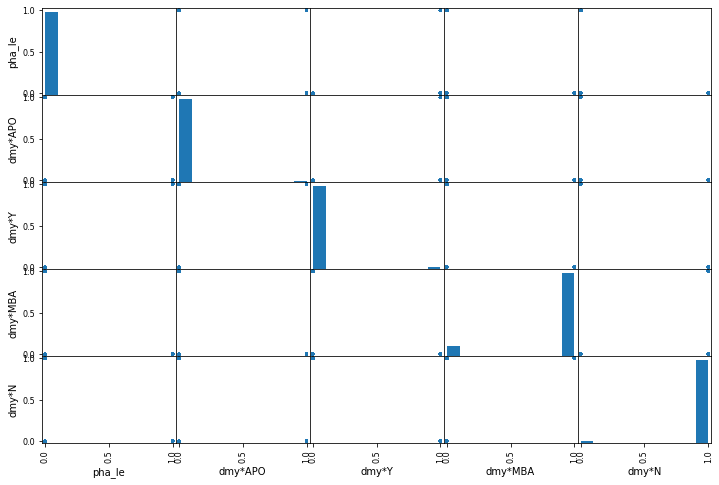

In [27]:
attributes = ["pha_le", "dmy*APO", "dmy*Y",
              "dmy*MBA", "dmy*N"]
scatter_matrix(datacleaned2[attributes], figsize=(12, 8))

In [28]:
display(datacleaned2)

,pha_le,spkid,H,diameter,albedo,diameter_sigma,epoch,epoch_mjd,epoch_cal,e,...,dmy*AST,dmy*ATE,dmy*CEN,dmy*IEO,dmy*IMB,dmy*MBA,dmy*MCA,dmy*OMB,dmy*TJN,dmy*TNO
0,0.0,2000001.0,3.400,939.400,0.0900,0.200,2458600.5,58600.0,20190427.0,0.076009,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.0,2000002.0,4.200,545.000,0.1010,18.000,2459000.5,59000.0,20200531.0,0.229972,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.0,2000003.0,5.330,246.596,0.2140,10.594,2459000.5,59000.0,20200531.0,0.256936,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.0,2000004.0,3.000,525.400,0.4228,0.200,2458600.5,58600.0,20190427.0,0.088721,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.0,2000005.0,6.900,106.699,0.2740,3.140,2459000.5,59000.0,20200531.0,0.190913,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
958519,0.0,3246801.0,17.135,3.972,0.0790,0.332,2437203.5,37203.0,19600926.0,0.185919,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
958520,0.0,3246834.0,18.500,3.972,0.0790,0.332,2459000.5,59000.0,20200531.0,0.282920,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
958521,1.0,3013075.0,20.400,3.972,0.0790,0.332,2459000.5,59000.0,20200531.0,0.662446,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
958522,0.0,3246457.0,18.071,3.972,0.0790,0.332,2441956.5,41956.0,19731001.0,0.202053,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


## Applying stratified shuffle split to my data:

In [29]:
from sklearn.model_selection import StratifiedShuffleSplit

features = datacleaned2.loc[:,'spkid':'dmy*TNO']
X = features.values
y = datacleaned2['pha_le'].values
print("X.shape: {} y.shape: {}".format(X.shape,y.shape))

split = StratifiedShuffleSplit(n_splits=10,test_size=0.20,
                              random_state=42)
for train_index, test_index in split.split(X,y):
    X_train = X[train_index]
    X_test = X[test_index]
    y_train = y[train_index]
    y_test = y[test_index]

X.shape: (938599, 49) y.shape: (938599,)


In [30]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(750879, 49) (187720, 49) (750879,) (187720,)


## Target variable 'y' is a boolean and is categorical. Therefore optimal machine learning algorithms will be classifiers such as logistic regression and decision trees

## Testing different parameters for logistic regression through C, the strength of regularization

In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report

logreg = LogisticRegression().fit(X_train, y_train)

print("Training set score: {:.3f}".format(logreg.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg.score(X_test, y_test)))
print(classification_report(y_test, logreg.predict(X_test), target_names=["0.0", "1.0"]))

Training set score: 0.998
Test set score: 0.998
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    187307
         1.0       0.00      0.00      0.00       413

    accuracy                           1.00    187720
   macro avg       0.50      0.50      0.50    187720
weighted avg       1.00      1.00      1.00    187720



## Testing on stratified shuffle split data

In [32]:
# Default parameters:
from sklearn.model_selection import cross_val_score


scores = cross_val_score(logreg, X_test, y_test, cv=split)
print("Cross-validation scores:\n{}".format(scores))

Cross-validation scores:
[0.99778926 0.99778926 0.99778926 0.99778926 0.99778926 0.99778926
 0.99778926 0.99778926 0.99778926 0.99778926]


In [33]:
logreg100 = LogisticRegression(C=100).fit(X_train, y_train)

print("Testing on C=100:\n")
print("Training set score: {:.3f}".format(logreg100.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg100.score(X_test, y_test)))
print(classification_report(y_test, logreg100.predict(X_test), target_names=["0.0", "1.0"]))

scores100 = cross_val_score(logreg100, X_test, y_test, cv=split)
print("Cross-validation scores:\n{}".format(scores100))

Testing on C=100:

Training set score: 0.998
Test set score: 0.998
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    187307
         1.0       0.00      0.00      0.00       413

    accuracy                           1.00    187720
   macro avg       0.50      0.50      0.50    187720
weighted avg       1.00      1.00      1.00    187720

Cross-validation scores:
[0.99778926 0.99778926 0.99778926 0.99778926 0.99778926 0.99778926
 0.99778926 0.99778926 0.99778926 0.99778926]


In [34]:
logreg001 = LogisticRegression(C=0.01).fit(X_train, y_train)

print("Training set score: {:.3f}".format(logreg001.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg001.score(X_test, y_test)))
print(classification_report(y_test, logreg001.predict(X_test), target_names=["0.0", "1.0"]))

scores001 = cross_val_score(logreg001, X_test, y_test, cv=split)
print("Cross-validation scores:\n{}".format(scores001))

Training set score: 0.998
Test set score: 0.998
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    187307
         1.0       0.00      0.00      0.00       413

    accuracy                           1.00    187720
   macro avg       0.50      0.50      0.50    187720
weighted avg       1.00      1.00      1.00    187720

Cross-validation scores:
[0.99778926 0.99778926 0.99778926 0.99778926 0.99778926 0.99778926
 0.99778926 0.99778926 0.99778926 0.99778926]


## Testing using decision trees on stratified data

In [35]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)

print("Training set score: {:.3f}".format(tree.score(X_train, y_train)))
print("Test set score: {:.3f}".format(tree.score(X_test, y_test)))
print(classification_report(y_test, tree.predict(X_test), target_names=["0.0", "1.0"]))

scoretree = cross_val_score(tree, X_test, y_test, cv=split)
print("Cross-validation scores:\n{}".format(scoretree))

Training set score: 1.000
Test set score: 1.000
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    187307
         1.0       0.99      0.97      0.98       413

    accuracy                           1.00    187720
   macro avg       1.00      0.98      0.99    187720
weighted avg       1.00      1.00      1.00    187720

Cross-validation scores:
[0.99994673 0.99986682 0.99997336 0.99989346 0.99997336 0.99986682
 0.99986682 0.99986682 0.99992009 0.99989346]


In [36]:
tree3 = DecisionTreeClassifier(max_depth=3, random_state=0, splitter='best')

tree3.fit(X_train, y_train)
print("Training set score: {:.3f}".format(tree3.score(X_train, y_train)))
print("Test set score: {:.3f}".format(tree3.score(X_test, y_test)))
print(classification_report(y_test, tree3.predict(X_test), target_names=["0.0", "1.0"]))

scoretree3 = cross_val_score(tree, X_test, y_test, cv=split)
print("Cross-validation scores:\n{}".format(scoretree3))

Training set score: 1.000
Test set score: 1.000
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    187307
         1.0       0.98      0.99      0.98       413

    accuracy                           1.00    187720
   macro avg       0.99      0.99      0.99    187720
weighted avg       1.00      1.00      1.00    187720

Cross-validation scores:
[0.99994673 0.99986682 0.99997336 0.99989346 0.99997336 0.99986682
 0.99986682 0.99986682 0.99992009 0.99989346]


In [37]:
tree5 = DecisionTreeClassifier(max_depth=5, random_state=0)

tree5.fit(X_train, y_train)
print("Training set score: {:.3f}".format(tree5.score(X_train, y_train)))
print("Test set score: {:.3f}".format(tree5.score(X_test, y_test)))
print(classification_report(y_test, tree5.predict(X_test), target_names=["0.0", "1.0"]))

scoretree5 = cross_val_score(tree, X_test, y_test, cv=split)
print("Cross-validation scores:\n{}".format(scoretree5))

Training set score: 1.000
Test set score: 1.000
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    187307
         1.0       0.99      0.97      0.98       413

    accuracy                           1.00    187720
   macro avg       0.99      0.99      0.99    187720
weighted avg       1.00      1.00      1.00    187720

Cross-validation scores:
[0.99994673 0.99986682 0.99997336 0.99989346 0.99997336 0.99986682
 0.99986682 0.99986682 0.99992009 0.99989346]


In [38]:
#def plot_feature_importances_datacleaned2(model):
#    n_features = X_test.shape[1]
#    plt.barh(np.arange(n_features), model.feature_importances_, align='center')
#    plt.yticks(np.arange(n_features), ('dmy*APO', 'dmy*Y', 'dmy*MBA', 'dmy*N'))
#    plt.xlabel("Feature importance")
#    plt.ylabel("Feature")
#    plt.ylim(-1, n_features)
#
#plot_feature_importances_datacleaned2(tree)
#
# Plotting feature importance was not working for me, kept getting the following error 
# "ValueError: The number of FixedLocator locations (49), usually from a call to set_ticks, does 
# not match the number of ticklabels (4)"

Feature: 0, Score: 0.00114
Feature: 1, Score: 0.79903
Feature: 2, Score: 0.00000
Feature: 3, Score: 0.00000
Feature: 4, Score: 0.00045
Feature: 5, Score: 0.00054
Feature: 6, Score: 0.00000
Feature: 7, Score: 0.00000
Feature: 8, Score: 0.00093
Feature: 9, Score: 0.00000
Feature: 10, Score: 0.00108
Feature: 11, Score: 0.00211
Feature: 12, Score: 0.00072
Feature: 13, Score: 0.00073
Feature: 14, Score: 0.00129
Feature: 15, Score: 0.00038
Feature: 16, Score: 0.00000
Feature: 17, Score: 0.00098
Feature: 18, Score: 0.00128
Feature: 19, Score: 0.00000
Feature: 20, Score: 0.00000
Feature: 21, Score: 0.00000
Feature: 22, Score: 0.18191
Feature: 23, Score: 0.00078
Feature: 24, Score: 0.00000
Feature: 25, Score: 0.00000
Feature: 26, Score: 0.00049
Feature: 27, Score: 0.00061
Feature: 28, Score: 0.00109
Feature: 29, Score: 0.00085
Feature: 30, Score: 0.00000
Feature: 31, Score: 0.00000
Feature: 32, Score: 0.00040
Feature: 33, Score: 0.00080
Feature: 34, Score: 0.00212
Feature: 35, Score: 0.00000
Fe

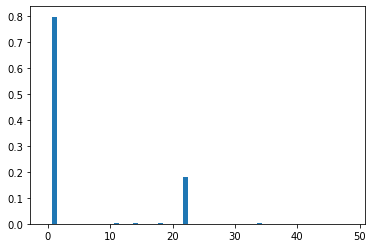

In [39]:
#Found this code while looking up how to plot feature importance for a decision tree:

from matplotlib import pyplot

importance = tree.feature_importances_
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [40]:
#print("Feature importance:")
#print(tree.feature_importances_)

## Decision trees seem the way to tackle this classification task. Even with a higher amount of leaves, the algorithm was capable of being more accurate than the logistic regression